## Techniques, Principles and Algorithms that go into building collaborative filters

### Similarity Measures
How can we mathematically quantify how different or similar two items are to each other

 1. Euclidean distance - the length of the line segment joining two data points plotted on an n-dimensional Cartesian plane **The lower the Euclidean score, the more similar the two points are to each other**

The Euclidean score is mathematically defined as:

$$
  d(\mathbf {v1,v2})= \sqrt{\sum \limits_{i=1}^n (q_i-r_i)^2}
$$

In [5]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [6]:
# function to compute Euclidean distance
def euclidean(v1, v2):
    # convert 1-D Python lists to numpy vectors
    v1 = np.array(v1)
    v2 = np.array(v2)
    # compute vectors which is the element wise square of the distance
    diff = np.power(np.array(v1) - np.array(v2), 2)
    # perform summation of the elements of the above vector
    sigma_val = np.sum(diff)
    # compute square root amd return final euclidean score
    euclid_score =np.sqrt(sigma_val)
    return euclid_score

In [7]:
# define 3 users with rating for 5 movies
u1 = [5,1,2,4,5]
u2 = [1,5,4,2,1]
u3 = [5,2,2,4,4]

# from this, we see that 1 and 3 have fairly similar taste, while 2 and 1 have totally different tastes. Lets test5 our funtion 
euclidean(u1, u2)

7.483314773547883

In [8]:
euclidean(u1, u3)

1.4142135623730951

1 and 3 have a smaller euclidean score between them, compared to the score between 1 and 2. 
This proves that 1 and 3 have similar taste and the euclidean distance was able to capture the relationship between our users

 2. #### Pearson correlation

This is a score between -1 and 1, where -1 indicates total negative correlation and 1 indicates total positive correlation. 0 indicates that the two entities are in no way correlated with each other(independent of each other)

Take for example movie ratings from 2 users Bob and Alice
```
 Alice = [1,1,3,2,4]
 Bob = [2,2,4,3,5]
 ```
Their Eucledean distance would be ``` 2.2360679774997898 ```

But by just looking you can tell that Bob's rating is always higher by one compared to Alice's ratings. So it is safe to say that they are correlated.

Consider anothe user, Eve
```
eve = [5,5,3,4,2]
```
We see that eve has a totally different taste from Alice and their euclidean distance, ```6.324555320336759```

With Pearson correlation, we are able to make predictions on two very different people, as long as we have the rating of one, something euclidean distance can't

Pearson correlation can be expressed mathematically as follows:
$$
r =\frac{\sum\left(x_{i}-\bar{x}\right)\left(y_{i}-\bar{y}\right)}{\sqrt{\sum\left(x_{i}-\bar{x}\right)^{2} \sum\left(y_{i}-\bar{y}\right)^{2}}}
$$

In [10]:
# SciPy gives us access to a function that computes the pearson similarity scores
from scipy.stats import pearsonr
Alice = [1,1,3,2,4]
Bob = [2,2,4,3,5]

pearsonr(Alice, Bob)

PearsonRResult(statistic=1.0, pvalue=0.0)

In [11]:
eve = [5,5,3,4,2]
pearsonr(Alice, eve)

PearsonRResult(statistic=-1.0, pvalue=0.0)

3. #### Cosine Similarity
We used this extensively while building our [Content-based recommenders](https://github.com/CKawara/Recommendation-engines-with-Python/tree/main/Content-Based-Recommenders).

It computes the cosine of the angle between two vectors in an n-dimensional space. When the score is 1, the vesctors are exactly similar. -1 in the other hand, denotes that the two vectors are exactly dissimilar to each other

 - Different similarity scores are appropriet in different scenarios, in cases where magnitudeis important, the Euclidean distance is important. But in our case, correlation is more important to us, so we will be using Pearson and cosine similarity scores for our engines.

### Clustering


A type of unsupervised learning that groups data points into different classes in such a way that data points belong to a particular class are more similar to each other than data points belonging to different classes

#### k-means clustering
It takes in the data points and the number of clusters(k) as input, then it randomly plots k different points on the plane(centroids). it repeats assignment and reassignment of points to the centroids until there's no further change in the set of k centroids

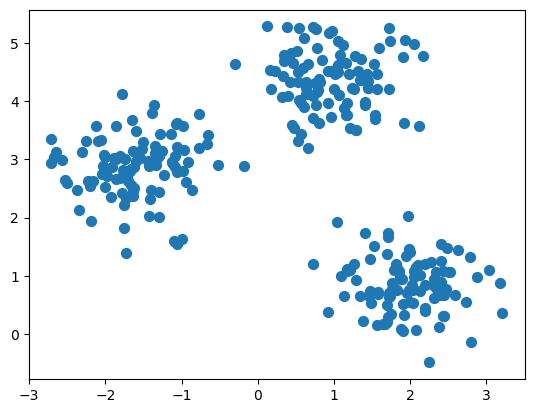

In [12]:
# Import the function that enables us to plot clusters
from sklearn.datasets._samples_generator import make_blobs

# get points such that they form 3 visually separable clusters
x,y = make_blobs(n_samples=300, centers=3, cluster_std=0.50, random_state=0)

# plot the points on a scatterplot
plt.scatter(x[:, 0], x[:, 1], s=50)